# Count Vectorizer

In [1]:
import pandas as pd

In [2]:
series = pd.read_pickle("textClean.pkl")
series

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

Clean, normalized text is turned into a **Document-Term Matrix (DTM)** for vectorization.<br>
* Each row represents a document, and each column represents a term.
* The values within the DTM can be word counts, TF-IDF scores, or other calculated values.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
cv = CountVectorizer(stop_words="english", ngram_range=(1, 2), min_df=.2, max_df=.8)

In [5]:
dtm = cv.fit_transform(series)
dtmDf = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtmDf

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


## EDA - Most Common Word

In [6]:
termFreq = dtmDf.sum()
termFreq

ice              2
ice tea          2
lemon           12
lemon lemon      6
lemonade         3
market           3
maven            2
maven market     2
tea              2
dtype: int64

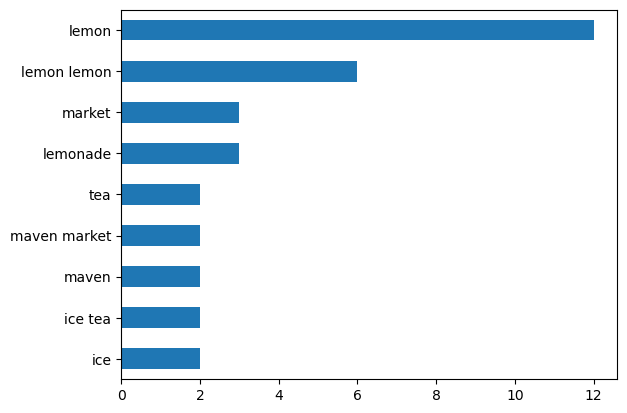

In [7]:
termFreq.sort_values().plot(kind="barh");

## Assignment

In [12]:
pd.set_option("display.max_colwidth", None)

In [17]:
booksDf = pd.read_pickle("booksClean.pkl")
booksDf.head(2)

,Ranking,Title,Author,Year,Rating,Description,DescriptionClean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",wild thing follow max young boy send room misbehave imago sailing island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak s whimsical illustration story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",hungry caterpillar tell story caterpillar eat variety food eventually butterfly eric carle s use colorful collage illustration rhythmic text book beloved classic young reader simple engage story introduce child day week counting concept metamorphosis s staple early childhood education


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer(stop_words="english", min_df=.1)
dtm = cv.fit_transform(booksDf["DescriptionClean"])
dtmDf = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtmDf

,adventure,beloved,book,boy,character,charming,child,classic,courage,early,...,tale,teach,tell,text,theme,timeless,way,whimsical,world,young
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
97,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
98,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
topTerms = dtmDf.sum().sort_values().tail(10)
topTerms

explore          30
theme            33
classic          36
adventure        39
reader           54
illustration     54
young            64
child            72
book             75
story           108
dtype: int64

In [28]:
bottomTerms = dtmDf.sum().sort_values().head(10)
bottomTerms

joy            10
perfect        10
favorite       10
embark         10
early          10
magical        11
importance     11
imaginative    11
girl           11
imagination    11
dtype: int64

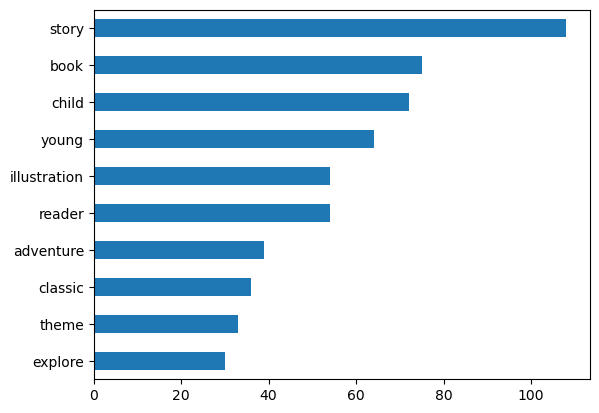

In [30]:
topTerms.plot(kind="barh");